# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import api_keys
key = 'c280ce5700cf1679dcce087b5b74f838'

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    cities.append(city)

len(cities)

1500

In [3]:
cities_df = pd.DataFrame(list(zip(lats, lngs, cities)) , columns=['lat', 'lng', 'city'])
cities_df = cities_df.drop_duplicates('city')
cities_df = cities_df[:575]
len(cities_df)

575

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
df_city = []
df_cloud = []
df_country = []
df_date = []
df_humidity = []
df_lat = []
df_lng = []
df_max = []
df_wind = []

for index, row in cities_df.iterrows():
    city_name = row['city']
    target_url = ('https://api.openweathermap.org/data/2.5/weather?q={}&appid={}&units=imperial').format(city_name, key)
    response = requests.get(target_url).json()
    
    try:
        print(f"Retrieving Results for Index {index}: {response['name']}.")
        df_city.append(response['name'])
        df_cloud.append(response['clouds']['all'])
        df_country.append(response['sys']['country'])
        df_date.append(response['dt'])
        df_humidity.append(response['main']['humidity'])
        df_lat.append(response['coord']['lat'])
        df_lng.append(response['coord']['lon'])
        df_max.append(response['main']['temp_max'])
        df_wind.append(response['wind']['speed'])
    except (KeyError, IndexError):
        print("City not found. Skipping...")

Retrieving Results for Index 0: Atuona.
Retrieving Results for Index 1: Borovoy.
Retrieving Results for Index 2: Mataura.
Retrieving Results for Index 3: Cidreira.
Retrieving Results for Index 5: Saldanha.
Retrieving Results for Index 6: Hobart.
Retrieving Results for Index 7: Black River.
Retrieving Results for Index 8: Ambulu.
Retrieving Results for Index 10: Chimoio.
Retrieving Results for Index 11: Port-Gentil.
Retrieving Results for Index 12: Tasiilaq.
Retrieving Results for Index 13: Albany.
Retrieving Results for Index 14: Hilo.
Retrieving Results for Index 15: Ostrovnoy.
Retrieving Results for Index 16: Mehamn.
Retrieving Results for Index 17: Samur.
Retrieving Results for Index 18: Zvishavane.
Retrieving Results for Index 19: Kahului.
Retrieving Results for Index 20: Kasrawad.
Retrieving Results for Index 21: Punta Arenas.
Retrieving Results for Index 22: Goderich.
Retrieving Results for Index 23: Puerto Ayora.
Retrieving Results for Index 24: Butaritari.
Retrieving Results fo

Retrieving Results for Index 286: Alice Springs.
Retrieving Results for Index 289: Tshikapa.
Retrieving Results for Index 291: Tautira.
Retrieving Results for Index 292: Hasaki.
Retrieving Results for Index 293: Palmer.
Retrieving Results for Index 296: Sangre Grande.
Retrieving Results for Index 298: Phaltan.
Retrieving Results for Index 299: Avarua.
Retrieving Results for Index 306: Moose Factory.
Retrieving Results for Index 307: Skibotn.
Retrieving Results for Index 309: La Ronge.
Retrieving Results for Index 312: Himatangi.
Retrieving Results for Index 314: Kupang.
City not found. Skipping...
Retrieving Results for Index 316: Vrangel.
Retrieving Results for Index 318: Comodoro Rivadavia.
Retrieving Results for Index 321: Ayan.
Retrieving Results for Index 323: Pisco.
Retrieving Results for Index 324: Zaysan.
Retrieving Results for Index 325: Faanui.
City not found. Skipping...
Retrieving Results for Index 334: Camacha.
City not found. Skipping...
City not found. Skipping...
Retrie

Retrieving Results for Index 760: Belyy Yar.
Retrieving Results for Index 763: San Cristobal.
Retrieving Results for Index 773: Bage.
Retrieving Results for Index 774: Airai.
Retrieving Results for Index 776: Tirlyanskiy.
Retrieving Results for Index 778: Coahuayana.
Retrieving Results for Index 787: Kaeo.
Retrieving Results for Index 791: Skibbereen.
Retrieving Results for Index 792: Ilinskiy.
Retrieving Results for Index 798: Jacareacanga.
Retrieving Results for Index 802: Nago.
Retrieving Results for Index 809: Caete.
Retrieving Results for Index 812: Mbini.
Retrieving Results for Index 813: Mattru.
Retrieving Results for Index 817: Port Hedland.
Retrieving Results for Index 819: Vestmannaeyjar.
Retrieving Results for Index 821: Nakhon Sawan.
Retrieving Results for Index 822: Merrill.
City not found. Skipping...
Retrieving Results for Index 827: Lukulu.
Retrieving Results for Index 829: Dong Hoi.
Retrieving Results for Index 830: Auki.
Retrieving Results for Index 832: Moerai.
Retri

In [5]:
weather_df = pd.DataFrame(list(zip(df_city, df_cloud, df_country, df_date, df_humidity, df_lat, df_lng, df_max, df_wind)), columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 9 columns):
City          513 non-null object
Cloudiness    513 non-null int64
Country       513 non-null object
Date          513 non-null int64
Humidity      513 non-null int64
Lat           513 non-null float64
Lng           513 non-null float64
Max Temp      513 non-null float64
Wind Speed    513 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 36.1+ KB


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv('weather.csv', sep=',')

In [7]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,64,PF,1550687510,100,-9.80,-139.03,81.22,18.25
1,Borovoy,88,RU,1550687511,81,63.23,52.89,18.67,14.00
2,Mataura,80,NZ,1550687512,89,-46.19,168.86,48.73,2.93
3,Cidreira,0,BR,1550687512,72,-30.17,-50.22,85.54,7.74
4,Saldanha,24,PT,1550687515,69,41.42,-6.55,50.80,5.61
5,Hobart,20,AU,1550685600,47,-42.88,147.33,55.40,12.75
6,Black River,20,JM,1550685600,62,18.03,-77.85,86.00,19.46
7,Ambulu,8,ID,1550687517,100,-8.35,113.61,77.57,2.59
8,Chimoio,20,MZ,1550685600,83,-19.11,33.48,71.60,6.93
9,Port-Gentil,75,GA,1550685600,83,-0.72,8.78,84.20,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5,1,'City Latitude vs. Max Temperature (01/18/19)')

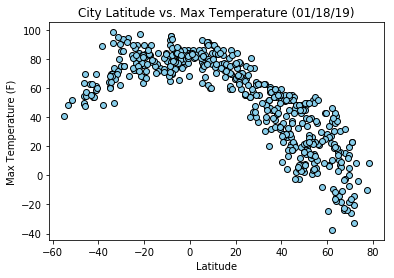

In [8]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], c='skyblue', edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (01/18/19)')

#### Latitude vs. Humidity Plot

Text(0.5,1,'City Latitude vs. Humidity (01/18/19)')

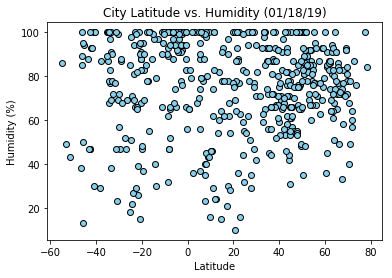

In [9]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], c='skyblue', edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (01/18/19)')

#### Latitude vs. Cloudiness Plot

Text(0.5,1,'City Latitude vs. Cloudiness (01/18/19)')

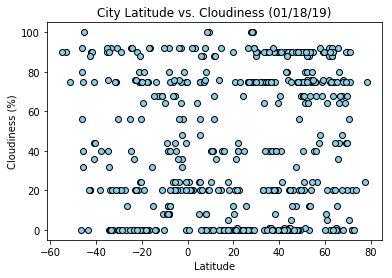

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], c='skyblue', edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (01/18/19)')

#### Latitude vs. Wind Speed Plot

Text(0.5,1,'City Latitude vs. Wind Speed (01/18/19)')

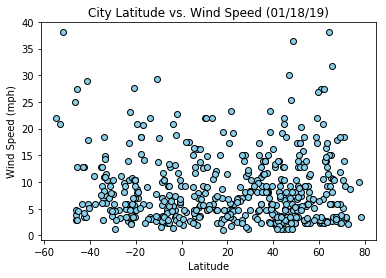

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], c='skyblue', edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (01/18/19)')